# 3.10 Exercises <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

031 A2023 Estadística 

Dr. Álvaro Eduardo Cordero Franco

Ismael Sandoval Aguilar 

Saturday 4th 2023

1. A consultant was called to assist the police department of a large metropolitan city in evaluating its human relations course for new officers. He planned a two-factor factorial experiment where the treatments were A—the type beat to which officers were assigned, and B—the length of the human relations course. A sample of 45 new officers was chosen, and 5 were randomly assigned to each of the 9 treatment combinations. A test was developed to measure officers’ attitude toward minority groups and was administered to the participating officers after their training had ended and they had experienced two weeks on their beat. Better attitudes result in higher scores on this test. Analysis of the data revealed a significant A×B interaction effect between the type beat and length of human relations course. 

- Construct an interaction graph.

In [ ]:
# Libraries
library(tidyverse)

In [ ]:
# Load the file
data_3_1 <- read_csv("data_3_1.csv")

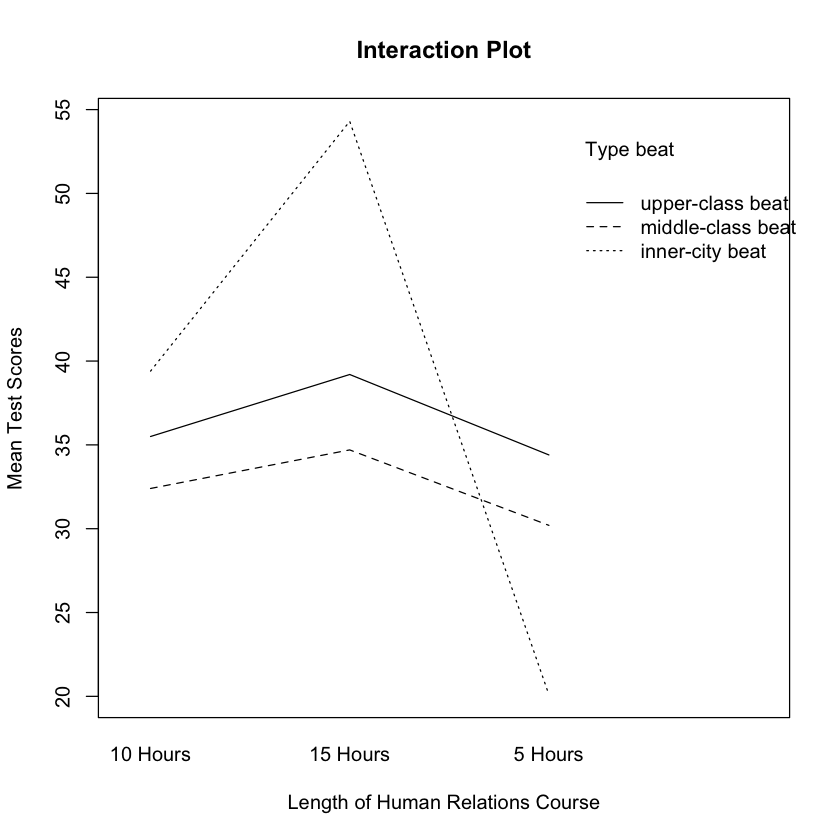

In [26]:
# Interaction plot
interaction.plot(data_3_1$Length_of_Human_Relations_Course, data_3_1$Type_Beat, data_3_1$Mean_Test_Scores, # nolint: line_length_linter.
                 main = "Interaction Plot",
                 xlab = "Length of Human Relations Course",
                 ylab = "Mean Test Scores",
                 trace.label = "Type beat")

- Write an interpretation of the interaction in a few complete sentences.

    From 10 hours to 15 hours:

    - There might be no or little interaction between the "middle-city beat" and "upper-class beat" levels. 
    - There's an interaction between the "inner-city beat" level against all the other levels.  
    - The positive slope of the "inner-city beat" level could suggest a main effect against the other levels. 
    - All lines have a maximum of 15 hours, which could suggest another main effect between the hours. 

    From 15 hours to 5 hours:

    - All lines have a negative slope, suggesting a reversal main effect. 
    - There's an interaction between the two factors.
    - All lines have a minimum of 5 hours. 

    Overall, there's an interaction between both factors.

2. A wooden catapult can be used to flip a foam ball. The catapult has three factors that can be adjusted: the start angle, the stop angle, and the pivot height. The distance the ball travels can be measured with a tape measure.

- If experiments were to be conducted with the catapult by flipping the ball and measuring the distance, what would the experimental unit be?

    The foam ball.

- Using the numbers 1, 2, and 3 to represent the levels of start angle and stop angle, and holding the pivot height constant at its high level, make a randomized list of experiments for a $3×3$ factorial experiment with $r = 2$ replicates per cell.

In [13]:
# Define the levels for the start angle and the stop angle
start_angles <- c(1, 2, 3)
stop_angles <- c(1, 2, 3)

# Create a data frame with all combinations
experiments <- expand.grid(start_angles, stop_angles)

# Replicate the combinations
replicated_design <- rbind(experiments, experiments)

# Randomize the order of the experimental runs
set.seed(100)
randomize_design <- replicated_design[sample(nrow(replicated_design)), ]

# Rename columns
colnames(randomize_design)[1] <- "start_angles"
colnames(randomize_design)[2] <- "stop_angles"

# Remove the index
row.names(randomize_design) <- NULL

randomize_design

start_angles,stop_angles
<dbl>,<dbl>
1,1
3,2
1,3
3,1
3,3
3,3
3,1
1,3
2,3


- If a catapult is available, conduct the list of experiments you wrote in part (b).

In [14]:
# Create a vector with random distances that follow a normal distribution
set.seed(100)
distances <- rnorm(18, mean = 50, sd = sqrt(12))

# Create a dataframe with the factors
dataset <- data.frame(
  distances = distances,
  start_angles = randomize_design[1],
  stop_angles = randomize_design[2]
)

dataset

distances,start_angles,stop_angles
<dbl>,<dbl>,<dbl>
48.26035,1,1
50.45564,3,2
49.72662,1,3
53.07191,3,1
50.40520,3,3
51.10377,3,3
47.98462,3,1
52.47521,1,3
47.14122,2,3


- Calculate the ANOVA with your resulting data and test the main effects and interaction.

In [15]:
# Generate the ANOVA model
anova <- aov(distances ~ start_angles * stop_angles, data = dataset)

The ANOVA model needs to follow the following assumptions:
- Independence of observations.
- The normality of the residuals are normal.
- Homoscedasticity.

Let's assume that the all observations are independent of each other. Now, to verify the normality of the residuals we are going to use the Shapiro-Wilk test with a level of significance of $\alpha = 0.05$:

In [16]:
# Shapiro-Wilk normality test
shapiro.test(residuals(anova))


	Shapiro-Wilk normality test

data:  residuals(anova)
W = 0.94247, p-value = 0.3193


Given that the p-value is greater than $\alpha$, we can't reject the null hypothesis: there's enough evidence that the residuals could be normally distributed. Finally, we are going to verify the homoscedasticity of the data by using the Bartlett test with a level of significance of $\alpha = 0.05$:

In [17]:
bartlett.test(distances ~ interaction(start_angles, stop_angles), data = dataset) # nolint: line_length_linter.


	Bartlett test of homogeneity of variances

data:  distances by interaction(start_angles, stop_angles)
Bartlett's K-squared = 10.536, df = 8, p-value = 0.2294


Since the p-value is greater than $\alpha$ we cannot conclude that all the variances are equal. This means that the ANOVA is less robust, however, we will continue with the analysis with an $\alpha = 0.05$.

In [18]:
#Results
summary(anova)

                         Df Sum Sq Mean Sq F value Pr(>F)
start_angles              1   2.31  2.3132   0.793  0.388
stop_angles               1   0.00  0.0011   0.000  0.985
start_angles:stop_angles  1   2.92  2.9235   1.003  0.334
Residuals                14  40.82  2.9159               

From the ANOVA table, we can observe that all p-values are greater than $\alpha$, therefore we fail to reject the null hypothesis. This means there is no statistically significant difference between the means of the groups.

- Explain or interpret any significant effects (use graphs if necessary to aid in your explanation).

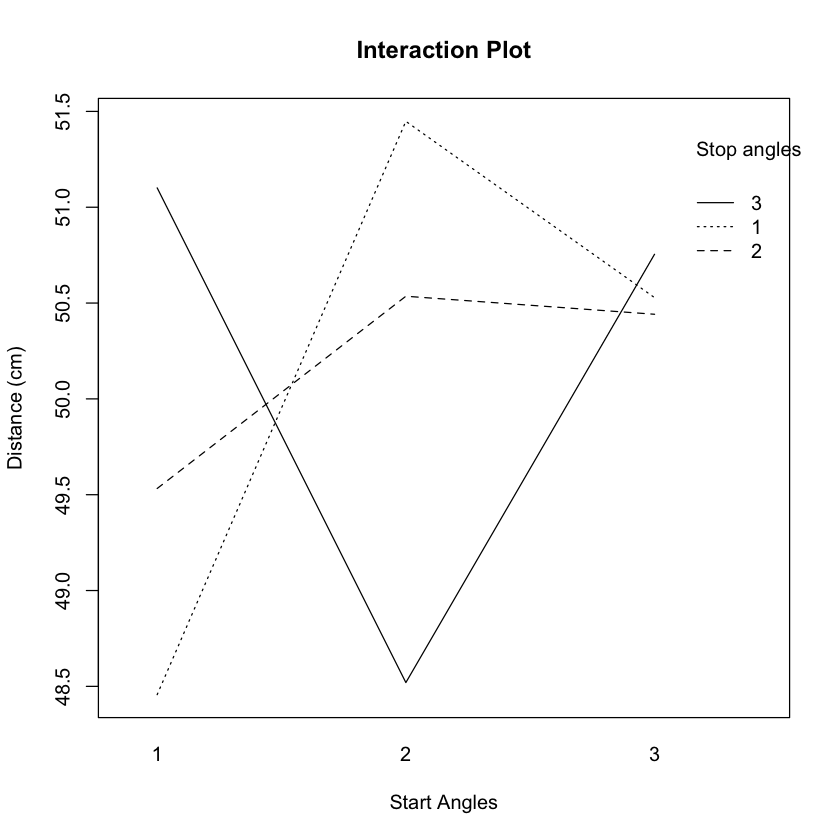

In [19]:
# Interaction plot
interaction.plot(dataset$start_angles, dataset$stop_angles, dataset$distances, # nolint: line_length_linter.
                 main = "Interaction Plot",
                 xlab = "Start Angles",
                 ylab = "Distance (cm)",
                 trace.label = "Stop angles")

From the interaction plot, we can observe an interaction between all factors. 

3. In an experiment to maximize the Y = resolution of a peak on a gas chromatograph, a significant interaction between A = column temperature and C = gas flow rate was found. 

- Construct an interaction graph.

In [ ]:
# Load the file
data3_3 <- read_csv("data_3_3.csv")

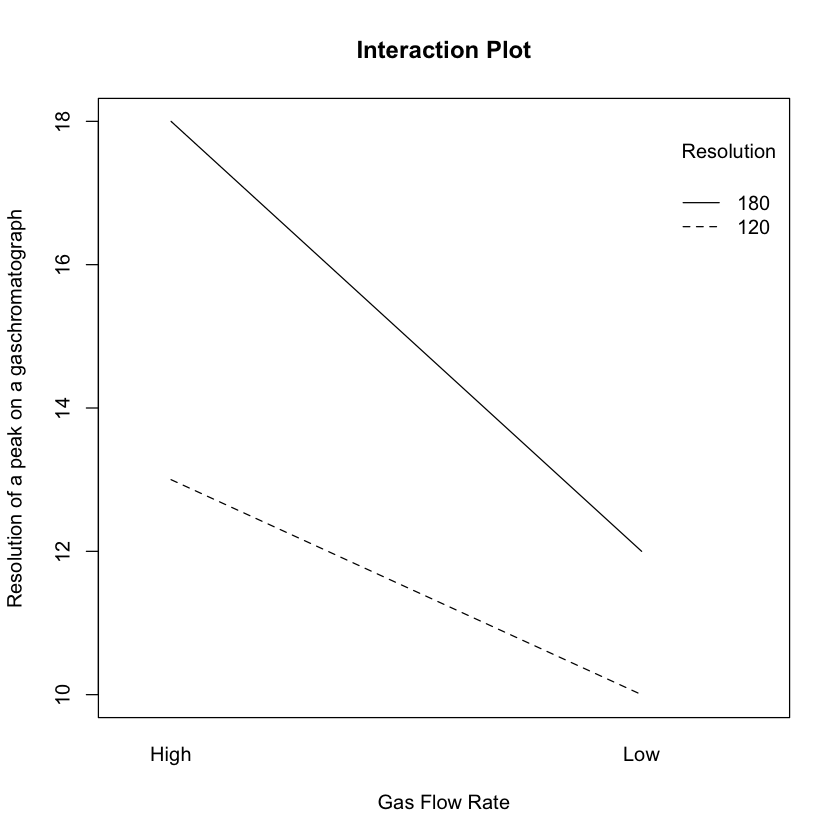

In [21]:
# Interaction Plot
interaction.plot(data3_3$Gas_Flow_Rate, data3_3$Column_Temperature, data3_3$Resolution, # nolint: line_length_linter.
                 main = "Interaction Plot",
                 xlab = "Gas Flow Rate",
                 ylab = "Resolution of a peak on a gaschromatograph",
                 trace.label = "Resolution")

- Write a sentence, or two, to interpret this interaction.

    There's a moderate reversal interaction between both factors. Also, the "High" level could be a main effect.